In [1]:
from mltrainer import CategorizerTrainer
from mlclassifier import Categorizer
from mlpreprocessor import Preprocessor
%matplotlib inline

Using Theano backend.


In [2]:
categories = ['bad_habits', 'education', 'alcohol', 'animals']
# inflicted_words_path = './inflicted_words'
methods = ['SVC', 'MultinomialNB']
features = ['words_raw']
train_data_path = './train.txt'
test_data_path = './test.txt'
model_save_path = './models_categories_nltk'

In [3]:
preprocessor = Preprocessor(tokenization='nltk')
print(preprocessor._tokenization)
preprocessor.prepare_data(train_data_path, categories, features)
train_data = preprocessor.data
preprocessor.balance_data()
train_data_balanced = preprocessor.data_balanced

nltk


bad_habits: zero=46159, one=16376 
education: zero=45721, one=16814 
alcohol: zero=47164, one=15371 
animals: zero=48432, one=14103 


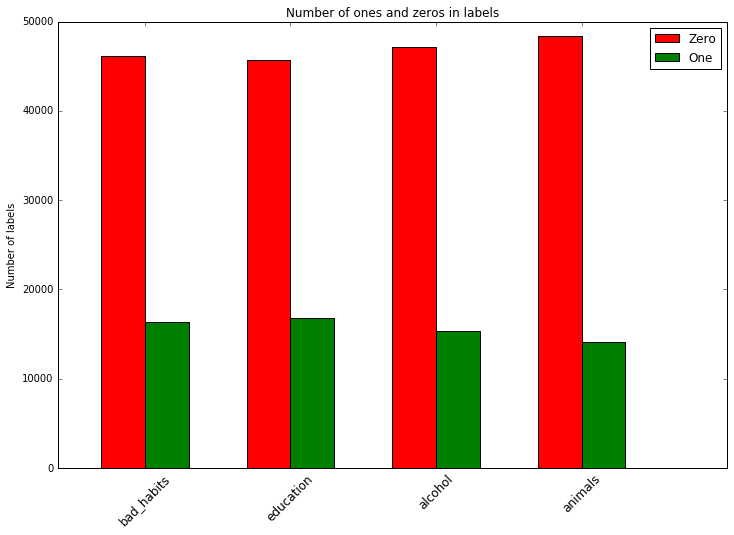

In [4]:
preprocessor.print_statistic()
preprocessor.draw_statistic()

bad_habits: zero=16376, one=16376 
education: zero=16814, one=16814 
alcohol: zero=15371, one=15371 
animals: zero=14103, one=14103 


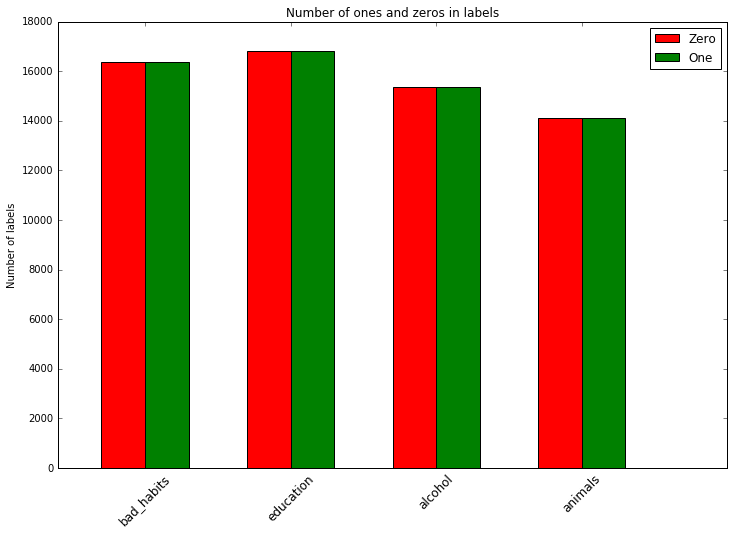

In [5]:
preprocessor.print_statistic(data_balanced=True)
preprocessor.draw_statistic(data_balanced=True)

In [6]:
trainer1 = CategorizerTrainer()
# trainer1.set_inflicted_words(inflicted_words_path)
trainer1.fit(train_data_balanced, methods, categories, features)
trainer1.save_models(model_save_path)

In [7]:
preprocessor.prepare_data(test_data_path, categories, features)
test_data = preprocessor.data
preprocessor.balance_data()
test_data_balanced = preprocessor.data_balanced

bad_habits: zero=11717, one=3917 
education: zero=11247, one=4387 
alcohol: zero=11820, one=3814 
animals: zero=12094, one=3540 


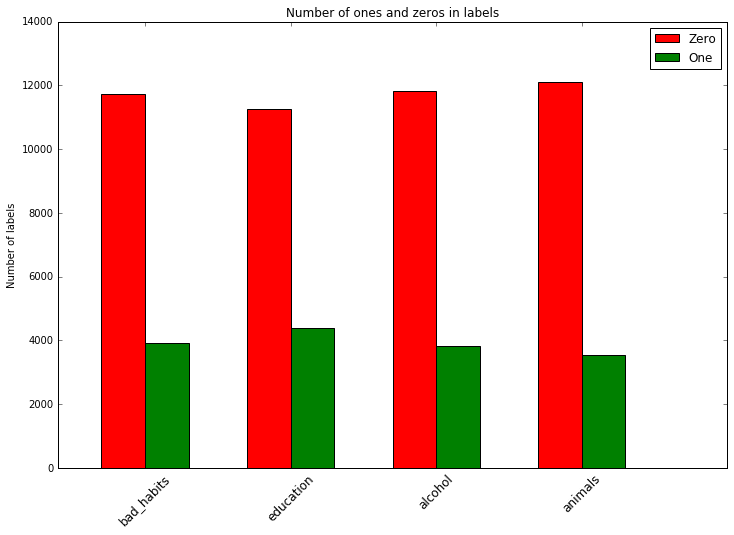

In [8]:
preprocessor.print_statistic()
preprocessor.draw_statistic()

bad_habits: zero=3917, one=3917 
education: zero=4387, one=4387 
alcohol: zero=3814, one=3814 
animals: zero=3540, one=3540 


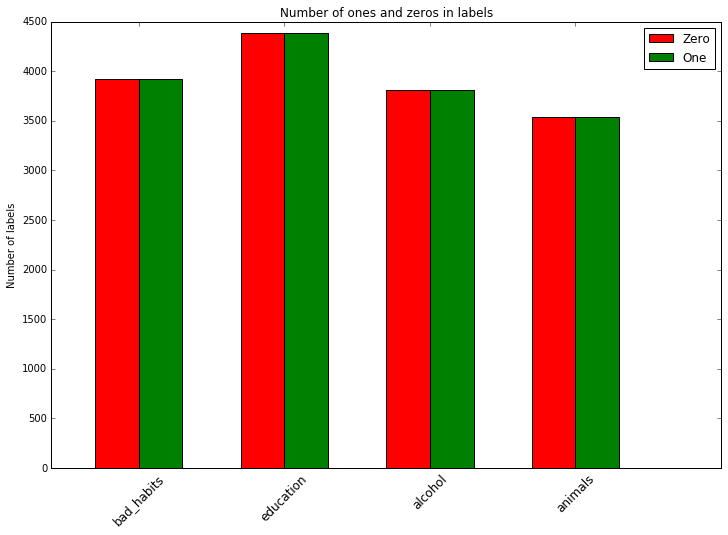

In [9]:
preprocessor.print_statistic(data_balanced=True)
preprocessor.draw_statistic(data_balanced=True)

In [10]:
trainer1.evaluate_models(test_data_balanced, save_metrics=True)
trainer1.print_metrics()

Model method: SVC
Category: education
confusion_matrix=[[4272, 115], [421, 3966]] acc=0.9389104171415545 pr=0.9718206321979906 f1=0.9367028814359943 total=8774 rc=0.9040346478231137 correct=8238
Category: animals
confusion_matrix=[[3463, 77], [300, 3240]] acc=0.9467514124293785 pr=0.9767862526379258 f1=0.9450196879101649 total=7080 rc=0.9152542372881356 correct=6703
Category: alcohol
confusion_matrix=[[3742, 72], [344, 3470]] acc=0.945464079706345 pr=0.9796725014116319 f1=0.9434475258292551 total=7628 rc=0.9098059779758784 correct=7212
Category: bad_habits
confusion_matrix=[[3708, 209], [373, 3544]] acc=0.9257084503446515 pr=0.9443112176925127 f1=0.9241199478487615 total=7834 rc=0.904774061781976 correct=7252


Model method: MultinomialNB
Category: education
confusion_matrix=[[4111, 276], [340, 4047]] acc=0.929792568953727 pr=0.9361554476058292 f1=0.9292766934557979 total=8774 rc=0.9224982904034648 correct=8158
Category: animals
confusion_matrix=[[3352, 188], [256, 3284]] acc=0.9372881

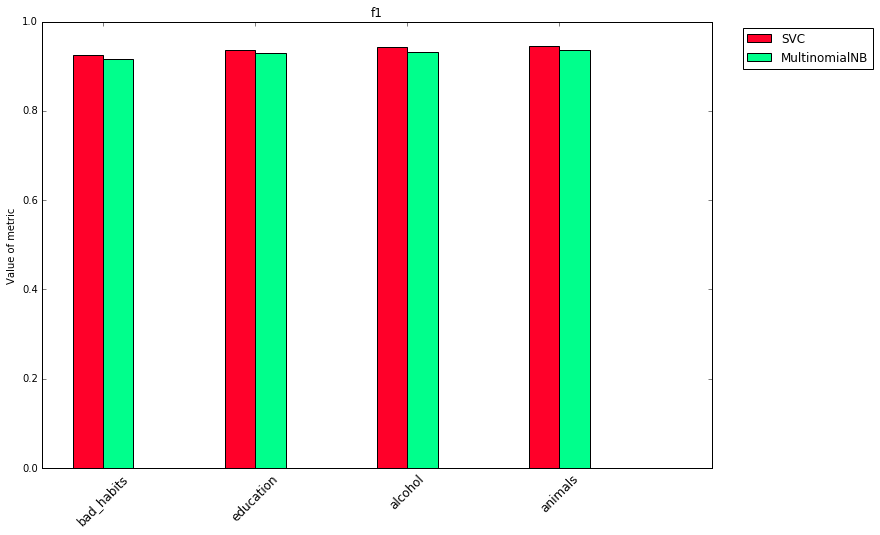

In [11]:
trainer1.draw_metrics('f1')

In [12]:
trainer2 = CategorizerTrainer()
trainer2.load_models(model_save_path)
print(trainer2._tokenization)

nltk


In [13]:
preprocessor2 = Preprocessor(tokenization='nltk')
print(preprocessor2._tokenization)
preprocessor2.prepare_data(test_data_path, categories, features)
test_data2= preprocessor2.data

trainer2.evaluate_models(test_data2)
trainer2.print_metrics()

nltk
Model method: SVC
Category: education
confusion_matrix=[[10941, 306], [405, 3982]] acc=0.9545221952155558 pr=0.9286380597014925 f1=0.9180403458213257 total=15634 rc=0.9076817870982448 correct=14923
Category: animals
confusion_matrix=[[11810, 284], [288, 3252]] acc=0.9634130740693361 pr=0.919683257918552 f1=0.9191633691351045 total=15634 rc=0.9186440677966101 correct=15062
Category: alcohol
confusion_matrix=[[11625, 195], [334, 3480]] acc=0.966163489829858 pr=0.9469387755102041 f1=0.9293630658298838 total=15634 rc=0.9124278972207656 correct=15105
Category: bad_habits
confusion_matrix=[[11080, 637], [362, 3555]] acc=0.936100805935781 pr=0.848043893129771 f1=0.8768035516093229 total=15634 rc=0.9075823334184324 correct=14635


Model method: MultinomialNB
Category: education
confusion_matrix=[[10494, 753], [312, 4075]] acc=0.9318792375591659 pr=0.8440347970173985 f1=0.8844275637547477 total=15634 rc=0.9288807841349441 correct=14569
Category: animals
confusion_matrix=[[11360, 734], [231

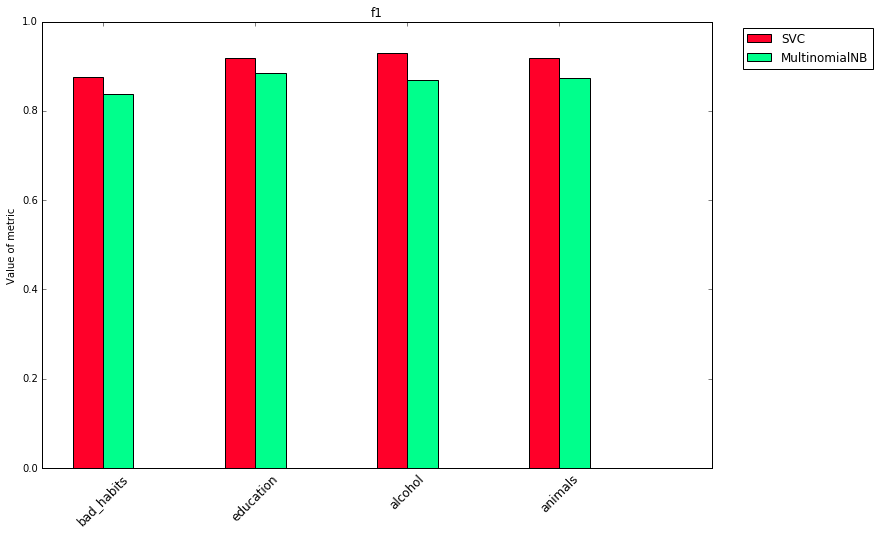

In [14]:
trainer2.draw_metrics('f1')